In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers

In [2]:
traindf = pd.read_csv("train_fare.csv")
testdf = pd.read_csv("test_fare.csv")

In [3]:
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [4]:
testdf

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,1,0,0
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,1,0,0
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,1,0,0
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,0,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,7,5,10,1,12,1,0,0
9910,-73.945511,40.803600,-73.960213,40.776371,6,7,1,12,2,17,0,0,0
9911,-73.991600,40.726608,-73.789742,40.647011,6,7,4,19,1,20,0,0,1
9912,-73.985573,40.735432,-73.939178,40.801731,6,7,1,31,7,1,0,0,1


In [5]:
def clean(df):
    # Delimiter lats and lons to NY only
    df = df[(-76 <= df['pickup_longitude']) & (df['pickup_longitude'] <= -72)]
    df = df[(-76 <= df['dropoff_longitude']) & (df['dropoff_longitude'] <= -72)]
    df = df[(38 <= df['pickup_latitude']) & (df['pickup_latitude'] <= 42)]
    df = df[(38 <= df['dropoff_latitude']) & (df['dropoff_latitude'] <= 42)]
    # Remove possible outliers
    df = df[(0 < df['fare_amount']) & (df['fare_amount'] <= 250)]
    # Remove inconsistent values
    df = df[(df['dropoff_longitude'] != df['pickup_longitude'])]
    df = df[(df['dropoff_latitude'] != df['pickup_latitude'])]
    
    return df

In [6]:
traindf = clean(traindf)

In [7]:
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [8]:
    
def manhattan(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)



def add_coordinate_features(df):
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    # Add new features
    df['latdiff'] = (lat1 - lat2)
    df['londiff'] = (lon1 - lon2)

    return df


def add_distances_features(df):
    # Add distances from airpot and downtown
    ny = (-74.0063889, 40.7141667)
    jfk = (-73.7822222222, 40.6441666667)
    ewr = (-74.175, 40.69)
    lgr = (-73.87, 40.77)
    
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    df['euclidean'] = (df['latdiff'] ** 2 + df['londiff'] ** 2) ** 0.5
    df['manhattan'] = manhattan(lat1, lon1, lat2, lon2)
    
    df['downtown_pickup_distance'] = manhattan(ny[1], ny[0], lat1, lon1)
    df['downtown_dropoff_distance'] = manhattan(ny[1], ny[0], lat2, lon2)
    df['jfk_pickup_distance'] = manhattan(jfk[1], jfk[0], lat1, lon1)
    df['jfk_dropoff_distance'] = manhattan(jfk[1], jfk[0], lat2, lon2)
    df['ewr_pickup_distance'] = manhattan(ewr[1], ewr[0], lat1, lon1)
    df['ewr_dropoff_distance'] = manhattan(ewr[1], ewr[0], lat2, lon2)
    df['lgr_pickup_distance'] = manhattan(lgr[1], lgr[0], lat1, lon1)
    df['lgr_dropoff_distance'] = manhattan(lgr[1], lgr[0], lat2, lon2)
    
    return df

In [9]:

add_coordinate_features(traindf)
add_coordinate_features(testdf)

traindf = add_distances_features(traindf)
testdf = add_distances_features(testdf)

traindf.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,...,euclidean,manhattan,downtown_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,...,0.009436,0.011742,0.169230,0.166668,0.139241,0.127499,0.362008,0.355668,0.074370,0.086112
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,...,0.079696,0.107481,0.012523,0.094958,0.300962,0.334883,0.180255,0.287736,0.204745,0.121272
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,...,0.013674,0.019212,0.070754,0.051542,0.317619,0.315415,0.263532,0.244320,0.121468,0.140680
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,...,0.025340,0.029386,0.038235,0.058747,0.293884,0.323270,0.231013,0.251525,0.153987,0.133475
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,...,0.019470,0.027194,0.092135,0.119329,0.309714,0.314028,0.284913,0.312107,0.100087,0.100417


In [10]:
testdf.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,...,euclidean,manhattan,downtown_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,...,0.021554,0.028080,0.082708,0.054628,0.310737,0.298877,0.275485,0.247405,0.109515,0.137595
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,...,0.023180,0.031841,0.024743,0.032537,0.279857,0.311698,0.217521,0.225314,0.167479,0.159686
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,...,0.005870,0.007991,0.060958,0.058707,0.307395,0.299404,0.253736,0.251485,0.131264,0.133515
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,...,0.018649,0.025460,0.078869,0.053409,0.322578,0.315694,0.271647,0.246187,0.113353,0.138813
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,...,0.050631,0.067867,0.115951,0.048084,0.329432,0.306603,0.308729,0.240862,0.115821,0.144138


In [11]:
dropped_columns = ['pickup_longitude', 'pickup_latitude', 
                   'dropoff_longitude', 'dropoff_latitude','passenger_count']
train_clean = traindf.drop(dropped_columns, axis=1)
test_clean = testdf.drop(dropped_columns, axis=1)

# peek data
train_clean.head(5)

,fare_amount,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,...,euclidean,manhattan,downtown_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,4.5,1,6,15,2,17,0,0,0,0.009041,...,0.009436,0.011742,0.169230,0.166668,0.139241,0.127499,0.362008,0.355668,0.074370,0.086112
1,16.9,2,1,5,3,16,0,0,0,-0.070701,...,0.079696,0.107481,0.012523,0.094958,0.300962,0.334883,0.180255,0.287736,0.204745,0.121272
2,5.7,3,8,18,5,0,0,0,1,0.010708,...,0.013674,0.019212,0.070754,0.051542,0.317619,0.315415,0.263532,0.244320,0.121468,0.140680
3,7.7,4,4,21,7,4,0,1,0,-0.024949,...,0.025340,0.029386,0.038235,0.058747,0.293884,0.323270,0.231013,0.251525,0.153987,0.133475
4,5.3,2,3,9,3,7,0,1,0,-0.015754,...,0.019470,0.027194,0.092135,0.119329,0.309714,0.314028,0.284913,0.312107,0.100087,0.100417


In [12]:
train_df, validate_df = train_test_split(train_clean, test_size=0.10, random_state=1)

# Get labels
train_labels = train_df['fare_amount'].values
validation_labels = validate_df['fare_amount'].values
train_df = train_df.drop(['fare_amount'], axis=1)
validate_df = validate_df.drop(['fare_amount'], axis=1)

In [13]:
scaler = preprocessing.MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
validation_df_scaled = scaler.transform(validate_df)
test_scaled = scaler.transform(test_clean)

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=train_df_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [15]:
history = model.fit(x=train_df_scaled, y=train_labels, batch_size=256, epochs=50, 
                    verbose=1, validation_data=(validation_df_scaled, validation_labels), 
                    shuffle=True)

Epoch 1/50
3646/3646 [==============================] - 26s 7ms/step - loss: 20.9741 - mae: 2.9403 - val_loss: 9.0476 - val_mae: 2.0631
Epoch 2/50
3646/3646 [==============================] - 23s 6ms/step - loss: 7.2703 - mae: 1.6849 - val_loss: 7.6723 - val_mae: 1.7098
Epoch 3/50
3646/3646 [==============================] - 23s 6ms/step - loss: 7.0291 - mae: 1.6419 - val_loss: 6.9094 - val_mae: 1.5710
Epoch 4/50
3646/3646 [==============================] - 23s 6ms/step - loss: 6.8569 - mae: 1.6108 - val_loss: 6.7019 - val_mae: 1.5418
Epoch 5/50
3646/3646 [==============================] - 24s 6ms/step - loss: 6.6682 - mae: 1.5783 - val_loss: 9.3427 - val_mae: 2.0184
Epoch 6/50
3646/3646 [==============================] - 24s 6ms/step - loss: 6.4965 - mae: 1.5499 - val_loss: 6.4701 - val_mae: 1.5194
Epoch 7/50
3646/3646 [==============================] - 23s 6ms/step - loss: 6.3845 - mae: 1.5339 - val_loss: 7.6526 - val_mae: 1.7207
Epoch 8/50
3646/3646 [==============================] 

In [16]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

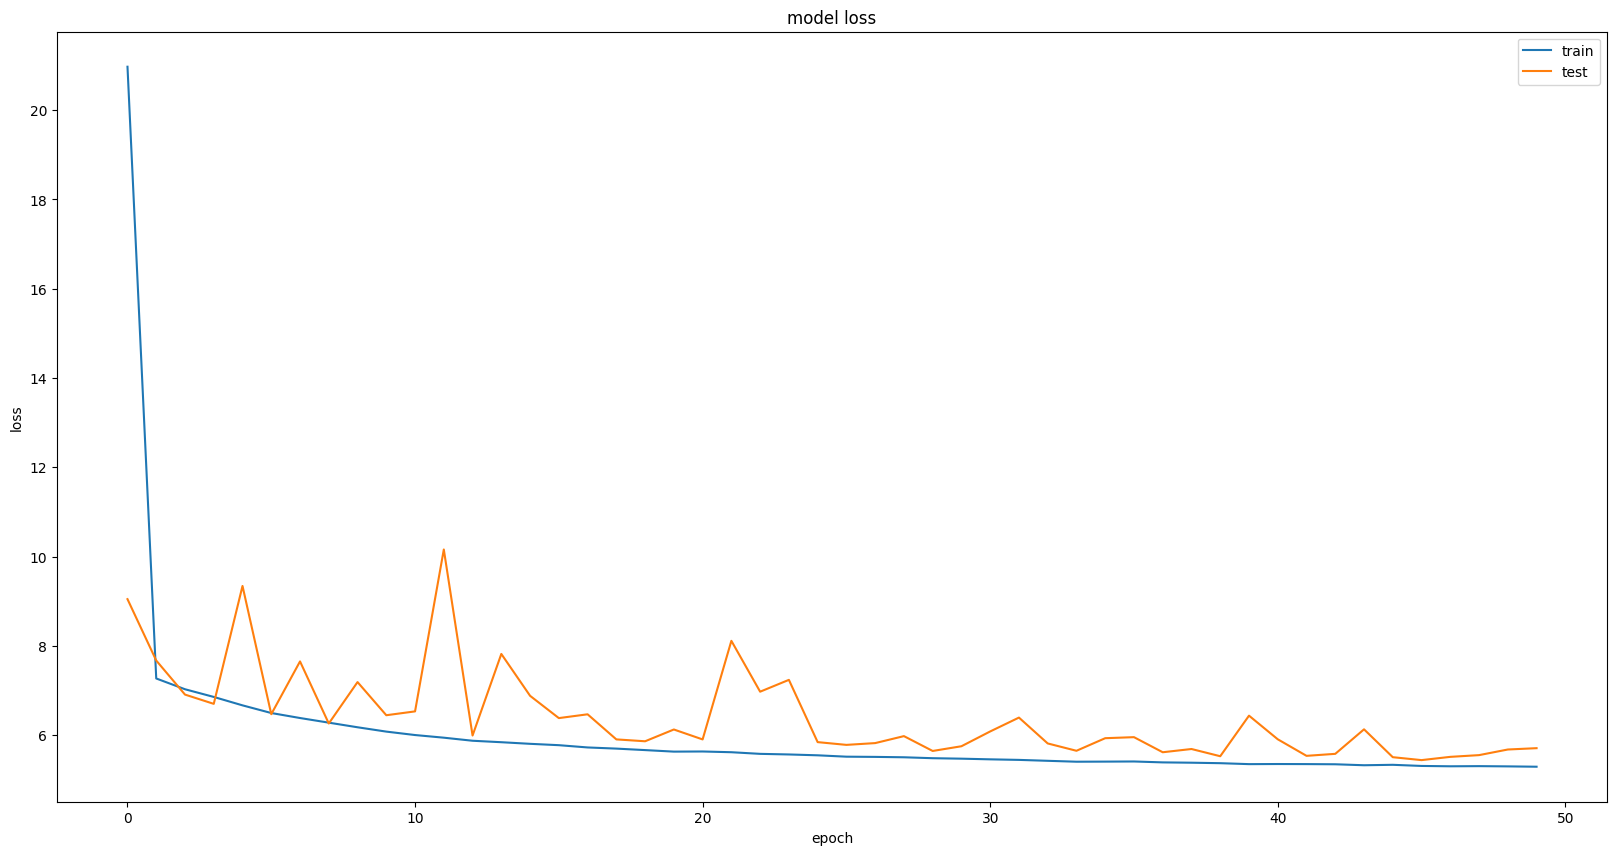

In [17]:
plot_loss_accuracy(history)

In [18]:
prediction = model.predict(test_scaled, batch_size=128, verbose=1)

78/78 [==============================] - 0s 3ms/step


In [34]:
def output_submission(raw_test, prediction, prediction_column, file_name):
    df = pd.DataFrame(prediction, columns=[prediction_column])
    df[[prediction_column]].to_csv((file_name), index=False)
    print('Output complete')

In [36]:
output_submission(testdf, prediction, 'fare_amount', 'predictions.csv')

Output complete
